In [2]:
import pandas as pd
import numpy as np

In [3]:
periods = [('2024-07-11', '2024-07-17'),  # PERIODS FOR JUST CLOVER
           ('2024-07-18', '2024-07-23'), 
           ('2024-07-24', '2024-07-29')
           ]
periods = [(pd.to_datetime(start).date(), pd.to_datetime(end).date()) for start, end in periods]

def which_period(date):
    for i, (start, end) in enumerate(periods, start=1):
        if start <= date <= end:
            return str(i)
    return np.nan

In [4]:
# ASSIGN PERIOD NUMBER TO IMAGE COUNTS DURING CLOVER SAMPLING

pi_date_color_counts = pd.read_csv('csvs/pi_date_color_counts.csv', index_col=False)
pi_date_color_counts['date'] = pd.to_datetime(pi_date_color_counts['date']).dt.date
pi_date_color_counts['count_per_10k'] = pi_date_color_counts['count']/10000

threshold = pd.to_datetime('2024-07-30').date()
pi_date_color_counts_clover = pi_date_color_counts[pi_date_color_counts['date'] < threshold]
pi_date_color_counts_clover['period'] = pi_date_color_counts_clover['date'].apply(which_period)
pi_date_color_counts_clover

/tmp/ipykernel_11465/1618116325.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pi_date_color_counts_clover['period'] = pi_date_color_counts_clover['date'].apply(which_period)


,color,date,pi,count,count_per_10k,period
0,blu,2024-07-11,8,18400,1.8400,1
1,blu,2024-07-12,8,18400,1.8400,1
2,blu,2024-07-13,3,8255,0.8255,1
3,blu,2024-07-13,8,18269,1.8269,1
4,blu,2024-07-14,3,35091,3.5091,1
...,...,...,...,...,...,...
454,yel,2024-07-27,8,46365,4.6365,3
455,yel,2024-07-28,4,46381,4.6381,3
456,yel,2024-07-28,8,46429,4.6429,3
457,yel,2024-07-29,4,46398,4.6398,3


In [5]:
# ASSIGN PERIOD TO VISIT TIMES

visit_durations_clover = pd.read_csv('csvs/visit_durations_clover.csv', index_col=False)
visit_durations_clover = visit_durations_clover[visit_durations_clover['species'] != "unk"] # IGNORE UNK BEES
visit_durations_clover['date'] = pd.to_datetime(visit_durations_clover['visit_start']).dt.date
visit_durations_clover['period'] = visit_durations_clover['date'].apply(which_period)

visit_durations_clover

,species,visit_id,pi,color,visit_start,visit_end,duration,pi_color,date,period
0,fervidus,69.0,9,grn,2024-07-11 07:28:42,2024-07-11 07:28:42,0.0,9_grn,2024-07-11,1
1,vosnesenskii,32.0,2,blv,2024-07-11 07:51:19,2024-07-11 07:51:19,0.0,2_blv,2024-07-11,1
2,vosnesenskii,80.0,6,cnt,2024-07-11 08:09:09,2024-07-11 08:09:09,0.0,6_cnt,2024-07-11,1
3,fervidus,29.0,4,grn,2024-07-11 08:40:37,2024-07-11 08:40:37,0.0,4_grn,2024-07-11,1
4,vosnesenskii,1.0,1,cnt,2024-07-11 08:43:51,2024-07-11 08:43:51,0.0,1_cnt,2024-07-11,1
...,...,...,...,...,...,...,...,...,...,...
286,vosnesenskii,124.0,8,yel,2024-07-29 12:43:35,2024-07-29 12:45:46,131.0,8_yel,2024-07-29,3
287,vosnesenskii,30.0,1,blv,2024-07-29 13:29:24,2024-07-29 13:29:24,0.0,1_blv,2024-07-29,3
288,vosnesenskii,146.0,9,grn,2024-07-23 09:41:43,2024-07-23 10:02:38,1255.0,9_grn,2024-07-23,2
289,vosnesenskii,147.0,9,grn,2024-07-23 10:02:19,2024-07-23 10:07:09,290.0,9_grn,2024-07-23,2


In [6]:
# TOTAL IMAGES PER PI EACH PERIOD

im_tot = (pi_date_color_counts_clover
          .groupby(['pi', 'period'], as_index=False)['count']
          .sum()
          .rename(columns={'count': 'n_images'}))
im_tot

,pi,period,n_images
0,1,1,88746
1,1,2,216546
2,1,3,276913
3,2,1,84102
4,2,2,184806
5,2,3,278031
6,3,1,83608
7,3,2,173314
8,3,3,278238
9,4,1,102004


In [7]:
# FOR EACH PI AND PERIOD, HOW MANY TIMES DID EACH SPECIES VISIT

n_visits = (visit_durations_clover
          .groupby(['pi', 'period', 'species'])
          .size()
          .reset_index(name='n_visits'))
n_visits

,pi,period,species,n_visits
0,1,1,fervidus,18
1,1,1,griseocollis,1
2,1,1,vosnesenskii,17
3,1,2,fervidus,1
4,1,2,vosnesenskii,7
...,...,...,...,...
63,10,1,vosnesenskii,5
64,10,2,nevadensis,1
65,10,2,vosnesenskii,7
66,10,3,griseocollis,1


In [8]:
# species_cols = [c for c in wide.columns if c not in ['pi', 'period', 'n_images']] 

In [9]:
# PIVOT WIDE, COLUMNS ARE SPECIES

wide = (n_visits
        .pivot_table(index=['pi', 'period'],
                     columns='species',
                     values='n_visits',
                     fill_value=0)
        .reset_index())

wide = wide.merge(im_tot, on=['pi', 'period'], how='left')
species_cols = [c for c in wide.columns if c not in ['pi', 'period', 'n_images']] 

wide

,pi,period,appositus,fervidus,griseocollis,mixtus,nevadensis,vosnesenskii,n_images
0,1,1,0.0,18.0,1.0,0.0,0.0,17.0,88746
1,1,2,0.0,1.0,0.0,0.0,0.0,7.0,216546
2,1,3,1.0,2.0,0.0,0.0,0.0,6.0,276913
3,2,1,0.0,2.0,1.0,0.0,0.0,5.0,84102
4,2,2,0.0,0.0,1.0,0.0,0.0,5.0,184806
5,2,3,0.0,2.0,0.0,0.0,0.0,3.0,278031
6,3,1,0.0,0.0,0.0,0.0,0.0,2.0,83608
7,3,2,0.0,1.0,0.0,0.0,0.0,2.0,173314
8,3,3,0.0,0.0,0.0,0.0,0.0,3.0,278238
9,4,1,0.0,11.0,0.0,0.0,0.0,5.0,102004


In [10]:
wide['pi_period'] = wide['pi'].astype(str) + '_' + wide['period'] # UNIQUE ID FOR PI + PERIOD COMBINATION

col_lookup = (pi_date_color_counts_clover 
              .drop_duplicates(subset=['pi', 'period'])
              .set_index(['pi', 'period'])['color'])
wide['color'] = [col_lookup.loc[(pi, per)] for pi, per in zip(wide['pi'], wide['period'])]
wide

,pi,period,appositus,fervidus,griseocollis,mixtus,nevadensis,vosnesenskii,n_images,pi_period,color
0,1,1,0.0,18.0,1.0,0.0,0.0,17.0,88746,1_1,cnt
1,1,2,0.0,1.0,0.0,0.0,0.0,7.0,216546,1_2,grn
2,1,3,1.0,2.0,0.0,0.0,0.0,6.0,276913,1_3,blv
3,2,1,0.0,2.0,1.0,0.0,0.0,5.0,84102,2_1,blv
4,2,2,0.0,0.0,1.0,0.0,0.0,5.0,184806,2_2,blv
5,2,3,0.0,2.0,0.0,0.0,0.0,3.0,278031,2_3,cnt
6,3,1,0.0,0.0,0.0,0.0,0.0,2.0,83608,3_1,blu
7,3,2,0.0,1.0,0.0,0.0,0.0,2.0,173314,3_2,blu
8,3,3,0.0,0.0,0.0,0.0,0.0,3.0,278238,3_3,grn
9,4,1,0.0,11.0,0.0,0.0,0.0,5.0,102004,4_1,grn


In [11]:
grouping = wide['color'].values
strata = wide['period'].values
data_mat = wide[species_cols].values
ids = wide['pi_period'].values

In [12]:
# EXPORT FOR USE IN R

wide_export = wide[['pi_period', 'color', 'period'] + species_cols]
# wide_export.to_csv('csvs/permanova/species_matrix_raw.csv', index=False)

%load_ext rpy2.ipython
%R -i wide_export

In [23]:
print(wide_export)

   pi_period color period  appositus  fervidus  griseocollis  mixtus  \
0        1_1   cnt      1        0.0      18.0           1.0     0.0   
1        1_2   grn      2        0.0       1.0           0.0     0.0   
2        1_3   blv      3        1.0       2.0           0.0     0.0   
3        2_1   blv      1        0.0       2.0           1.0     0.0   
4        2_2   blv      2        0.0       0.0           1.0     0.0   
5        2_3   cnt      3        0.0       2.0           0.0     0.0   
6        3_1   blu      1        0.0       0.0           0.0     0.0   
7        3_2   blu      2        0.0       1.0           0.0     0.0   
8        3_3   grn      3        0.0       0.0           0.0     0.0   
9        4_1   grn      1        0.0      11.0           0.0     0.0   
10       4_2   cnt      2        0.0       2.0           1.0     0.0   
11       4_3   yel      3        0.0       1.0           0.0     0.0   
12       5_1   yel      1        0.0       3.0           0.0    

In [14]:
%%R
library(vegan)

rownames(wide_export) <- wide_export$pi_period 
species_data <- wide_export[, 4:ncol(wide_export)] 

# PERMANOVA
result <- adonis2(species_data ~ color, data = wide_export,
                  strata = wide_export$period,
                  permutations = 9999,
                  method = "bray")
print(result)

# PERMDISP
dist_mat <- vegdist(species_data, method = "bray")
mod <- betadisper(dist_mat, wide_export$color)
print(anova(mod))

# Distances to centroid
disp_df <- data.frame(
  distance = mod$distances,
  group = mod$group,
  pi_period = names(mod$distances)
)

# Export
species_mat <- as.matrix(species_data)
meta_df <- wide_export[,c("pi_period","color","period")]

Permutation test for adonis under reduced model
Blocks:  strata 
Permutation: free
Number of permutations: 9999

adonis2(formula = species_data ~ color, data = wide_export, permutations = 9999, method = "bray", strata = wide_export$period)
         Df SumOfSqs      R2      F Pr(>F)   
Model     4  0.88749 0.29451 2.6091 0.0092 **
Residual 25  2.12592 0.70549                 
Total    29  3.01341 1.00000                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Analysis of Variance Table

Response: Distances
          Df  Sum Sq  Mean Sq F value Pr(>F)
Groups     4 0.09446 0.023615  1.4934 0.2343
Residuals 25 0.39534 0.015814               


Loading required package: permute
This is vegan 2.7-1
In addition: Warning message:
In betadisper(dist_mat, wide_export$color) :
  some squared distances are negative and changed to zero


In [15]:
%R -o species_mat -o meta_df -o disp_df

In [16]:
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Convert to DataFrame
species_df = pd.DataFrame(species_mat, index=meta_df["pi_period"])
species_df.index.name = "pi_period"

# Bray–Curtis distance
bc_dist = pdist(species_df.values, metric="braycurtis")
bc_dist_square = squareform(bc_dist)

# NMDS (2D)
nmds = MDS(n_components=2, dissimilarity="precomputed",
           random_state=42, metric=False, n_init=10, max_iter=1000)
nmds_coords = nmds.fit_transform(bc_dist_square)

scores_df = pd.DataFrame(nmds_coords, columns=["MDS1","MDS2"],
                         index=species_df.index).reset_index()
scores_df = scores_df.merge(meta_df, on="pi_period")


def plot_confidence_ellipse(x, y, ax, n_std=1.96, **kwargs):
    """
    Draws a confidence ellipse of width/height n_std standard deviations.
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    width, height = 2 * n_std * np.sqrt(vals)
    mean_x, mean_y = np.mean(x), np.mean(y)
    ell = Ellipse((mean_x, mean_y), width, height, angle=theta, **kwargs)
    ax.add_patch(ell)
    return ell

/home/misha/miniconda3/envs/bee_mapping/lib/python3.12/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [17]:
scores_df

,pi_period,MDS1,MDS2,color,period
0,1_1,-0.178080,0.000742,cnt,1
1,1_2,-0.103751,-0.042710,grn,2
2,1_3,0.279029,-0.189598,blv,3
3,2_1,0.391027,0.255457,blv,1
4,2_2,-0.191598,-0.423707,blv,2
5,2_3,-0.257126,-0.362653,cnt,3
6,3_1,-0.435593,-0.022172,blu,1
7,3_2,-0.443117,-0.195054,blu,2
8,3_3,0.162081,-0.419897,grn,3
9,4_1,0.191984,-0.313700,grn,1


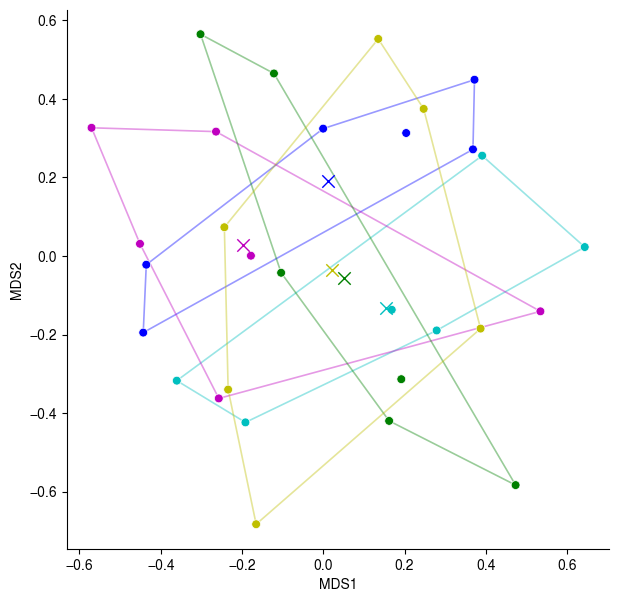

In [18]:

from scipy.spatial import ConvexHull


color_map = {
    'blu': 'b',
    'blv': 'c',
    'cnt': 'm',
    'grn': 'g',
    'yel': 'y'
}

plt.figure(figsize=(7,7))
ax = plt.gca()

for grp, df_grp in scores_df.groupby("color"):
    pts = df_grp[["MDS1", "MDS2"]].values
    if len(pts) >= 3:
        hull = ConvexHull(pts)
        poly = plt.Polygon(
            pts[hull.vertices],
            fill=False,
            edgecolor=color_map.get(grp, "k"),
            alpha=0.4,
            lw=1.2
        )
        ax.add_patch(poly)

sns.scatterplot(
    data=scores_df,
    x="MDS1", y="MDS2",
    hue="color",
    palette=color_map,
    s=40,
    ax=ax,
    legend=False
)

centroids = scores_df.groupby("color")[["MDS1", "MDS2"]].mean().reset_index()
for _, row in centroids.iterrows():
    ax.scatter(
        row["MDS1"], row["MDS2"],
        marker="x", s=80,
        color=color_map.get(row["color"], "k"), linewidth=1
    )


In [19]:
nmds.stress_

17.121762654644836

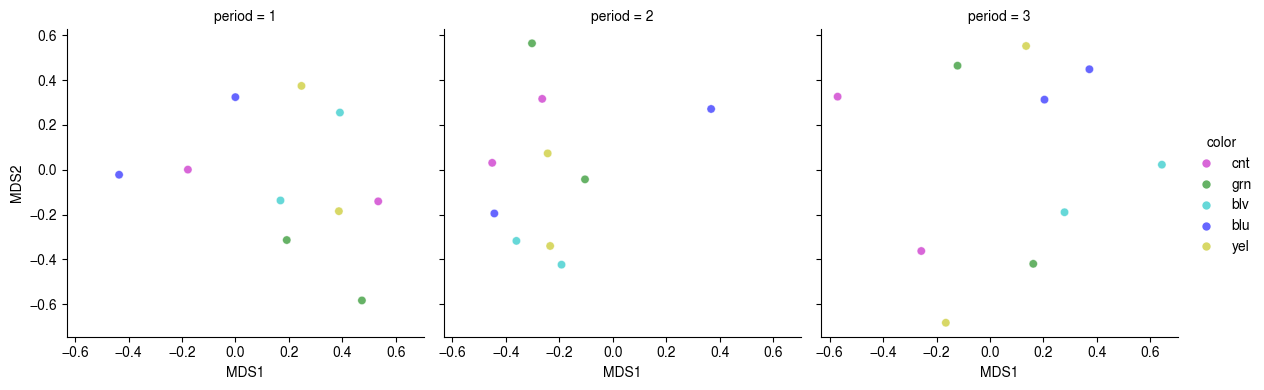

In [20]:
sns.relplot(
    data=scores_df, x="MDS1", y="MDS2",
    hue="color", palette=color_map,
    col="period", kind="scatter",
    height=4, aspect=1, alpha=0.6
)

/tmp/ipykernel_11465/2614851464.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=disp_df, x="group", y="distance",


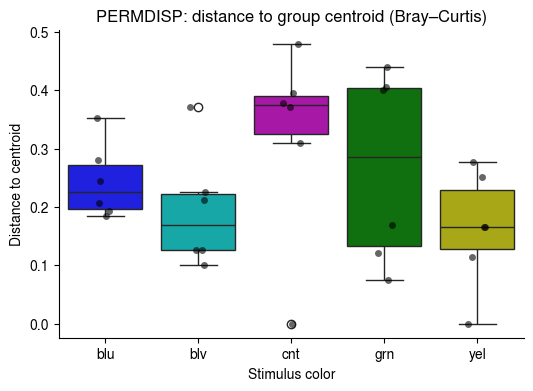

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(data=disp_df, x="group", y="distance",
            palette=color_map, order=color_map.keys())
sns.stripplot(data=disp_df, x="group", y="distance",
              color="black", alpha=0.6, jitter=True)
plt.title("PERMDISP: distance to group centroid (Bray–Curtis)")
plt.ylabel("Distance to centroid")
plt.xlabel("Stimulus color")
plt.show()

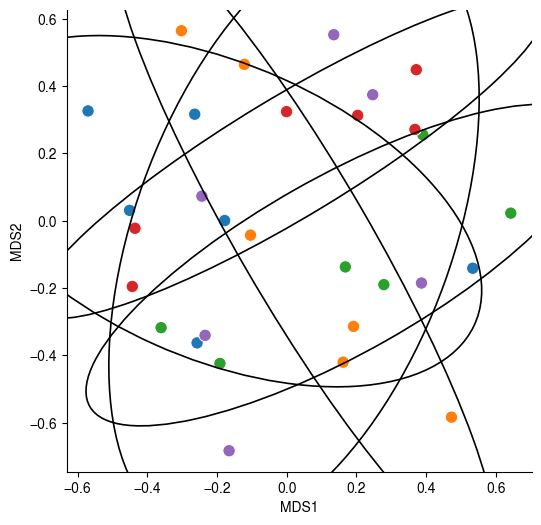

In [22]:


plt.figure(figsize=(6,6))
ax = plt.gca()
sns.scatterplot(data=scores_df, x="MDS1", y="MDS2",
                hue="color", s=80, legend =False)

for grp, df_grp in scores_df.groupby("color"):
    plot_confidence_ellipse(df_grp["MDS1"], df_grp["MDS2"],
                            ax, n_std=1.96, edgecolor='black',
                            facecolor='none', lw=1.2, label=f"{grp} ellipse")

